In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import fsolve
from scipy.optimize import least_squares
matplotlib.rcParams.update({'font.size':22})

In [2]:
def f(t,A,T,Vth):
    return A*np.sin(2*np.pi*t/T)-Vth

In [3]:
Vth=0.8 #threshold voltage (Volt)
A=1 #Sinewave amplitude (Volt)
wrf=200 #Sinewave frequency (MHz)
T=1/(1e6*wrf) #Sine wave period

if Vth>=0:
    root0 = fsolve(f, 0.24*T, args=(A,T,Vth))
    root1 = fsolve(f, 0.26*T, args=(A,T,Vth))
else:
    root0 = fsolve(f, 0.74*T, args=(A,T,Vth))
    root1 = fsolve(f, 0.76*T, args=(A,T,Vth))

In [4]:
(root1-root0)*1e9

array([1.02416382])

In [5]:
t=np.linspace(0,T,200)

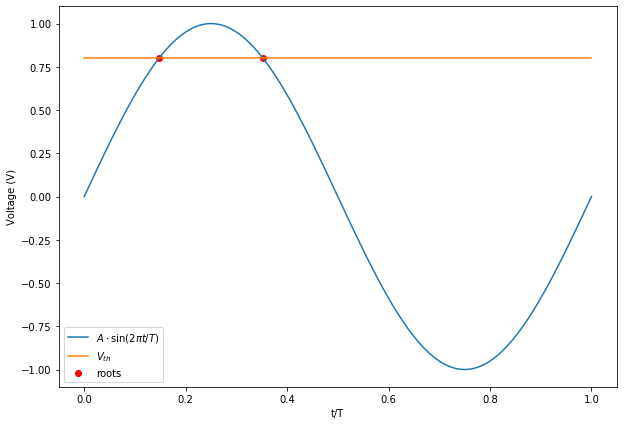

In [6]:
fig,ax=plt.subplots(figsize=(10,7))
ax.plot(t/T,f(t,A,T,Vth)+Vth,label='$A\cdot\sin(2\pi t/T)$')
ax.plot(t/T,Vth*np.ones(200),label='$V_{th}$')
ax.scatter([root0/T,root1/T],[Vth,Vth],c='r',label='roots')
plt.xlabel('t/T')
plt.ylabel('Voltage (V)')
plt.legend()

# Analytical solution:

The analytical solutions to the equation $V_{th}=A\cdot\sin(2\pi t/T)$ are given by $t=\frac{T}{2\pi}\arcsin(V_{th}/A)+2\pi n$ and $t=\frac{T}{2}-\frac{T}{2\pi}\arcsin(V_{th}/A)+2\pi n$, with $n$ an integer number. The two types of solutions occur in a single period, so that the distance between two solutions of our equation in a single sine period is
$\Delta t=\frac{T}{2}-\frac{T}{2\pi}\arcsin(V_{th}/A)-\frac{T}{2\pi}\arcsin(V_{th}/A)=\frac{T}{2}-\frac{T}{\pi}\arcsin(V_{th}/A)$. This gives our pulse length, given $V_{th}$ and $A$.

## Pulse length vs. threshold voltage

Numerical solution:

In [7]:
Vths=np.linspace(0.001,0.999,301)
wrf=50
T=1/(1e6*wrf)
tlen=np.array([])
for Vth in Vths:
    if Vth>=0:
        root0 = least_squares(f, 0.22*T, args=(A,T,Vth), bounds = (0,T/4))
        root1 = least_squares(f, 0.28*T, args=(A,T,Vth), bounds = (T/4,T/2))
    else:
        root0 = least_squares(f, 0.72*T, args=(A,T,Vth), bounds = (T/2,3*T/4))
        root1 = least_squares(f, 0.78*T, args=(A,T,Vth), bounds = (3*T/4,T))
    tlen=np.append(tlen,root1.x-root0.x)

Analytical solution:

In [8]:
tlen_an=T*(0.5-np.arcsin(Vths/A)/np.pi)

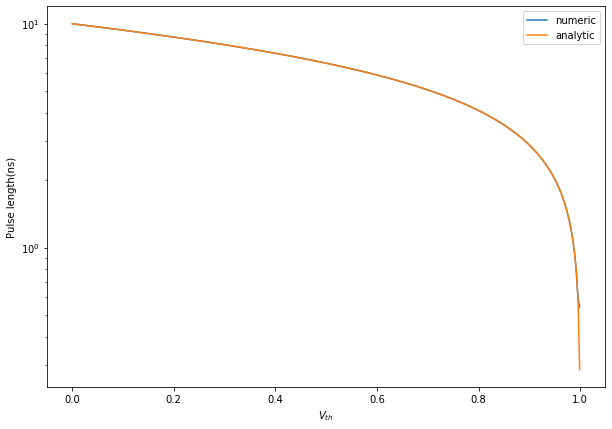

In [9]:
fig,ax=plt.subplots(figsize=(10,7))
ax.plot(Vths,tlen*1e9,label='numeric')
ax.plot(Vths,tlen_an*1e9,label='analytic')
plt.xlabel('$V_{th}$')
plt.ylabel('Pulse length(ns)')
plt.yscale('log')
plt.legend()

Consider different frequencies:

In [10]:
Vths=np.linspace(0.001,0.999,301)
wrfs=[50,100,150,200]
tlen_an=np.array([])
for wrf in wrfs:
    T=1/(1e6*wrf)
    tlen_an=np.append(tlen_an,T*(0.5-np.arcsin(Vths/A)/np.pi))
tlen_an=np.reshape(tlen_an,[len(wrfs),len(Vths)])

Text(0, 0.5, 'Pulse length(ns)')

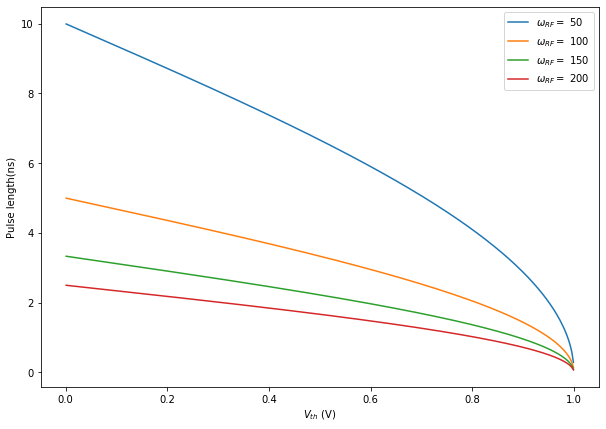

In [11]:
fig,ax=plt.subplots(figsize=(10,7))
for i in range(0,len(wrfs)):
    ax.plot(Vths,tlen_an[i,:]*1e9,label='$\omega_{RF}=$ %i' %wrfs[i])
plt.legend()
plt.xlabel('$V_{th}$ (V)')
plt.ylabel('Pulse length(ns)')

## Sensitivity to threshold change:

$\frac{d\Delta t}{dV_{th}}=-\frac{T}{2\pi A\sqrt{1-\big(\frac{V_{th}}{A}\big)^2}}$

In [12]:
Vths=np.linspace(0.001,0.999,301)
wrfs=[50,100,150,200]
dt_an=np.array([])
for wrf in wrfs:
    T=1/(1e6*wrf)
    dt_an=np.append(dt_an,T/(2*np.pi*A*np.sqrt(1-(Vths/A))))
dt_an=np.reshape(dt_an,[len(wrfs),len(Vths)])

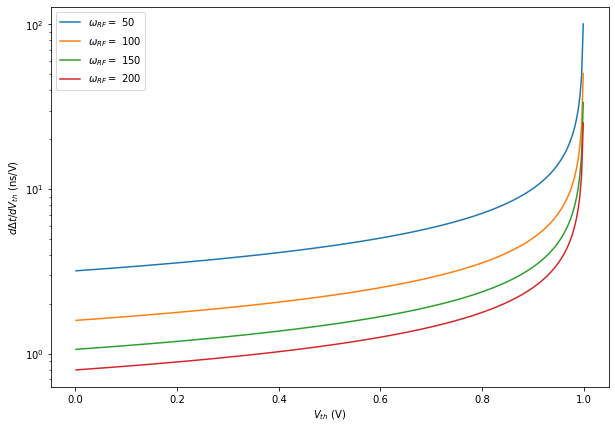

In [13]:
fig,ax=plt.subplots(figsize=(10,7))
for i in range(0,len(wrfs)):
    ax.plot(Vths,dt_an[i,:]*1e9,label='$\omega_{RF}=$ %i' %wrfs[i])
plt.legend()
plt.xlabel('$V_{th}$ (V)')
plt.ylabel('$d\Delta t/dV_{th}$ (ns/V)')
plt.yscale('log')

## Pulse length vs. frequency

In [14]:
Vths=[0.5,0.6,0.7,0.8,0.9]
wrfs=np.linspace(50,200,301)
Ts=1/(1e6*wrfs)
tlen_an=np.array([])
for Vth in Vths:
    tlen_an=np.append(tlen_an,Ts*(0.5-np.arcsin(Vth/A)/np.pi))
tlen_an=np.reshape(tlen_an,[len(Vths),len(wrfs)])

Text(0, 0.5, 'Pulse length(ns)')

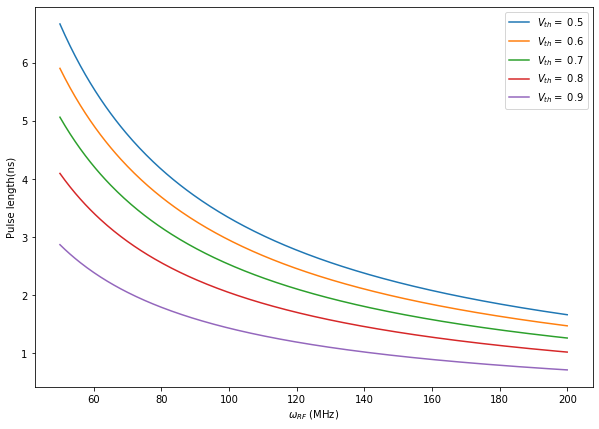

In [15]:
fig,ax=plt.subplots(figsize=(10,7))
for i in range(0,len(Vths)):
    ax.plot(wrfs,tlen_an[i,:]*1e9,label='$V_{th}=$ %1.1f' %Vths[i])
plt.legend()
plt.xlabel('$\omega_{RF}$ (MHz)')
plt.ylabel('Pulse length(ns)')

## Sensitivity to frequency change:

$\frac{d\Delta t}{df}=\frac{d\Delta t}{dT}\frac{dT}{df}=-T^2\frac{d\Delta t}{dT}=-\frac{T^2}{2}+\frac{T^2}{\pi}\arcsin(V_{th}/A)$

In [16]:
Vths=[0.5,0.6,0.7,0.8,0.9]
wrfs=np.linspace(50,200,301)
Ts=1/(1e6*wrfs)
dt_an=np.array([])
for Vth in Vths:
    dt_an=np.append(dt_an,-Ts**2*(0.5-np.arcsin(Vth/A)/np.pi))
dt_an=np.reshape(dt_an,[len(Vths),len(wrfs)])

Text(0, 0.5, '$d\\Delta t/df_{th}$ (ns/MHz)')

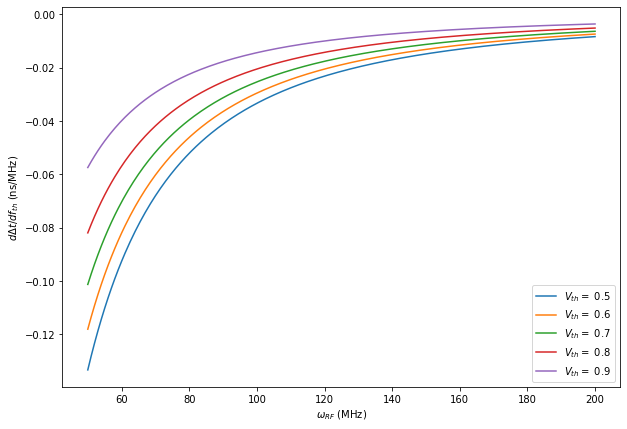

In [17]:
fig,ax=plt.subplots(figsize=(10,7))
for i in range(0,len(Vths)):
    ax.plot(wrfs,dt_an[i,:]*1e15,label='$V_{th}=$ %1.1f' %Vths[i])
plt.legend()
plt.xlabel('$\omega_{RF}$ (MHz)')
plt.ylabel('$d\Delta t/df_{th}$ (ns/MHz)')